In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\tomas\Desktop\Praca dyplomowa\Tweets_Kaggle_Clean.csv")  # Zmień na właściwą nazwę pliku
print(df.info())  # Sprawdzenie typów danych
print(df.head())
print(df.columns)  # Sprawdzenie, jakie są kolumny
print(df["airline_sentiment"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

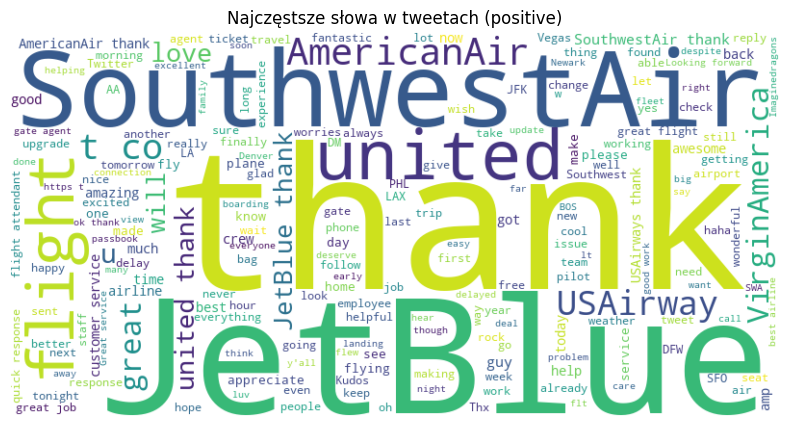

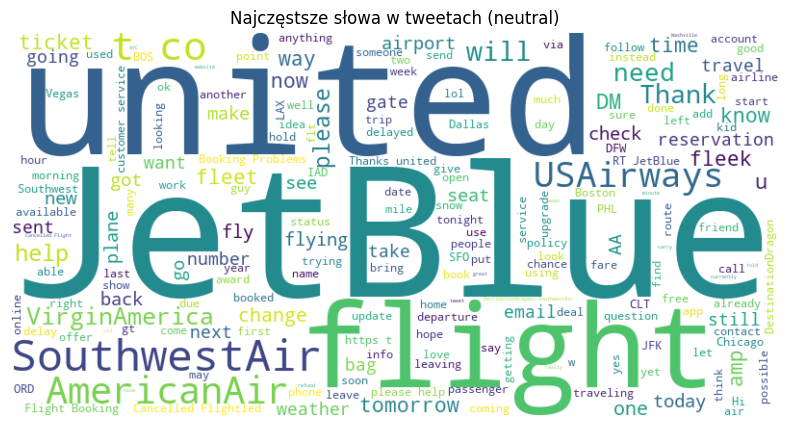

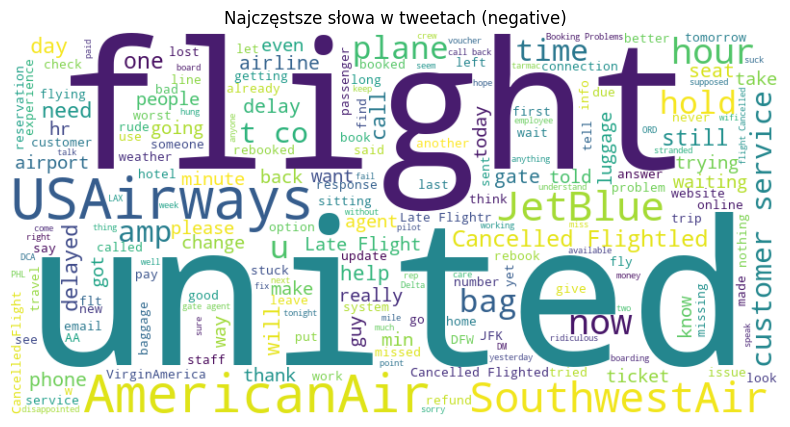

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Funkcja do tworzenia chmury słów
def generate_wordcloud(df, sentiment):
    text = " ".join(df[df["airline_sentiment"] == sentiment]["text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Najczęstsze słowa w tweetach ({sentiment})")
    plt.show()

# Chmura słów dla każdej kategorii
for sentiment in ["positive", "neutral", "negative"]:
    generate_wordcloud(df, sentiment)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


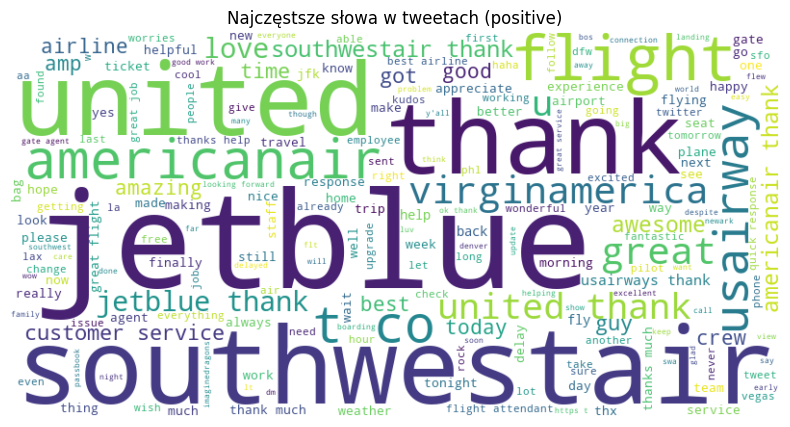

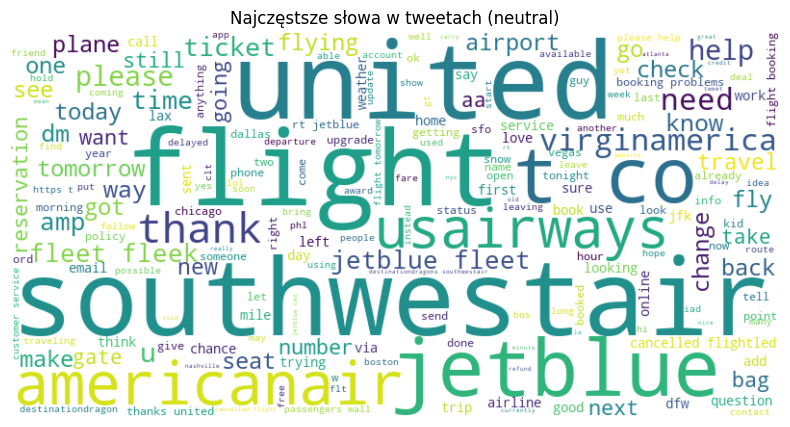

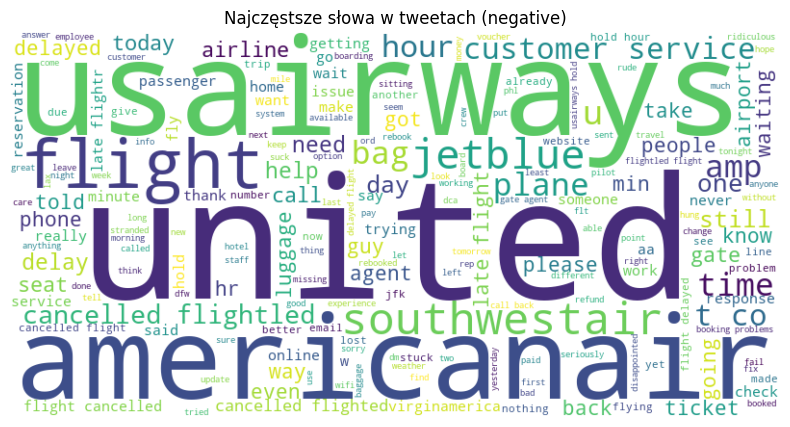

In [3]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Lista nazw linii lotniczych do usunięcia
airlines = ["united", "american", "delta", "southwest", "jetblue", "virginamerica", "usairways"]

# Funkcja do czyszczenia tekstu
def clean_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words and word not in airlines]
    return " ".join(words)

# Tworzymy nową kolumnę z oczyszczonym tekstem
df["clean_text"] = df["text"].apply(clean_text)

# Generowanie chmury słów bez zbędnych słów
def generate_wordcloud(sentiment):
    text = " ".join(df[df["airline_sentiment"] == sentiment]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Najczęstsze słowa w tweetach ({sentiment})")
    plt.show()

# Tworzymy chmurę słów dla każdego sentymentu
for sentiment in ["positive", "neutral", "negative"]:
    generate_wordcloud(sentiment)


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Funkcja do wyświetlania top N słów dla danego sentymentu
def get_top_words(df, sentiment, n=10):
    vectorizer = CountVectorizer(stop_words="english")
    sentiment_texts = df[df["airline_sentiment"] == sentiment]["clean_text"]
    
    X = vectorizer.fit_transform(sentiment_texts)
    word_counts = X.toarray().sum(axis=0)
    
    words_freq = list(zip(vectorizer.get_feature_names_out(), word_counts))
    words_freq.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nNajczęstsze słowa w tweetach ({sentiment}):")
    for word, freq in words_freq[:n]:
        print(f"{word}: {freq}")

# Wyświetlenie top 10 słów dla każdej kategorii sentymentu
for sentiment in ["positive", "neutral", "negative"]:
    get_top_words(df, sentiment, n=10)



Najczęstsze słowa w tweetach (positive):
thanks: 611
southwestair: 576
jetblue: 574
united: 508
thank: 455
flight: 381
americanair: 355
usairways: 276
great: 236
http: 217

Najczęstsze słowa w tweetach (neutral):
jetblue: 733
united: 709
southwestair: 671
flight: 615
http: 501
americanair: 499
usairways: 395
virginamerica: 176
help: 170
flights: 169

Najczęstsze słowa w tweetach (negative):
flight: 2943
united: 2753
usairways: 2364
americanair: 2110
southwestair: 1214
jetblue: 1015
cancelled: 926
service: 750
hours: 649
help: 619


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Lista zbędnych słów do usunięcia
extra_stopwords = {"flight", "flights", "http", "https", "airline", "plane", 
                   "americanair", "jetblue", "united", "southwestair", "usairways", "virginamerica"}

# Funkcja do wyświetlania top N słów bez zbędnych fraz
def get_top_words(df, sentiment, n=10):
    vectorizer = CountVectorizer(stop_words="english")
    sentiment_texts = df[df["airline_sentiment"] == sentiment]["clean_text"]
    
    X = vectorizer.fit_transform(sentiment_texts)
    word_counts = X.toarray().sum(axis=0)
    
    words_freq = list(zip(vectorizer.get_feature_names_out(), word_counts))
    words_freq = [(word, freq) for word, freq in words_freq if word not in extra_stopwords]
    words_freq.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nNajczęstsze słowa w tweetach ({sentiment}):")
    for word, freq in words_freq[:n]:
        print(f"{word}: {freq}")

# Wyświetlenie top 10 słów dla każdej kategorii sentymentu
for sentiment in ["positive", "neutral", "negative"]:
    get_top_words(df, sentiment, n=10)



Najczęstsze słowa w tweetach (positive):
thanks: 611
thank: 455
great: 236
service: 162
love: 136
customer: 114
guys: 110
good: 109
best: 105
awesome: 100

Najczęstsze słowa w tweetach (neutral):
help: 170
need: 164
thanks: 157
dm: 132
tomorrow: 109
fleek: 107
know: 104
fleet: 103
cancelled: 101
amp: 98

Najczęstsze słowa w tweetach (negative):
cancelled: 926
service: 750
hours: 649
help: 619
customer: 614
hold: 614
time: 598
delayed: 508
amp: 503
hour: 452


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Tworzymy wektor cech TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)  # max_features ogranicza liczbę słów
X = vectorizer.fit_transform(df["clean_text"])

# Konwersja sentymentu na liczby (0 = negatywny, 1 = neutralny, 2 = pozytywny)
y = df["airline_sentiment"].map({"negative": 0, "neutral": 1, "positive": 2})

# Podział na zestaw treningowy i testowy (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenowanie modelu Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
print("\n📊 Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("\n🎯 Dokładność modelu:", accuracy_score(y_test, y_pred))



📊 Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      1889
           1       0.73      0.27      0.39       580
           2       0.88      0.39      0.54       459

    accuracy                           0.75      2928
   macro avg       0.78      0.55      0.59      2928
weighted avg       0.76      0.75      0.71      2928


🎯 Dokładność modelu: 0.7482923497267759


In [7]:
from sklearn.linear_model import LogisticRegression

# Zamiast Naive Bayes
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Sprawdzenie jakości nowego modelu
print("\n📊 Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("\n🎯 Dokładność modelu:", accuracy_score(y_test, y_pred))



📊 Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1889
           1       0.65      0.46      0.54       580
           2       0.79      0.61      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928


🎯 Dokładność modelu: 0.7889344262295082


In [8]:
import numpy as np

# Pobranie nazw cech (słów) i współczynników z modelu
feature_names = vectorizer.get_feature_names_out()
class_labels = ["negative", "neutral", "positive"]

# Pobranie wag cech z modelu regresji logistycznej
for i, label in enumerate(class_labels):
    top_words = np.argsort(model.coef_[i])[-10:]  # 10 najważniejszych słów
    print(f"\n🔹 Najbardziej wpływowe słowa dla klasy '{label}':")
    print([feature_names[j] for j in top_words])



🔹 Najbardziej wpływowe słowa dla klasy 'negative':
['hrs', 'fix', 'delay', 'luggage', 'cancelled', 'hour', 'hold', 'delayed', 'worst', 'hours']

🔹 Najbardziej wpływowe słowa dla klasy 'neutral':
['possible', 'need', 'question', 'number', 'policy', 'united', 'americanair', 'southwestair', 'hi', 'jetblue']

🔹 Najbardziej wpływowe słowa dla klasy 'positive':
['thx', 'appreciate', 'excellent', 'best', 'love', 'amazing', 'awesome', 'great', 'thanks', 'thank']
